In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6
from scipy.optimize import curve_fit

In [56]:
def exp_decay(x,a,r):
    return a * ((1-r)**x)

In [57]:
x = np.linspace(0,50,50)

In [58]:
y = exp_decay(x, 400, 0.06)

In [59]:
y1 = exp_decay(x, 550, 0.06)

In [60]:
xx = np.linspace(0,10,10)

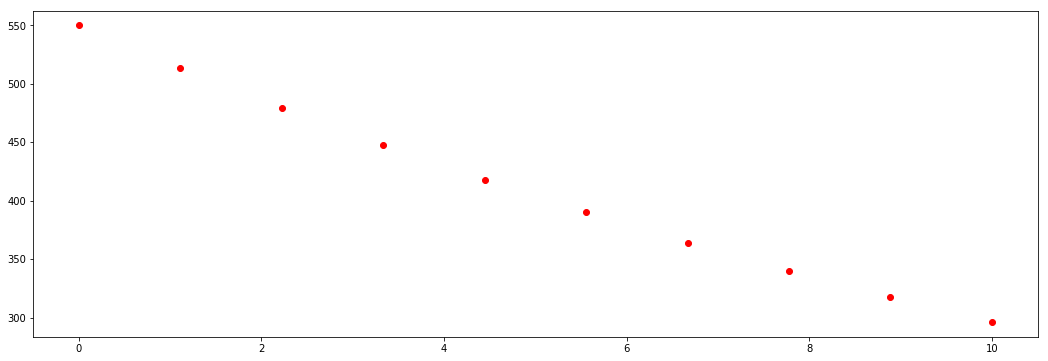

In [61]:
plt.plot(xx, exp_decay(xx, 550, 0.06),'ro')

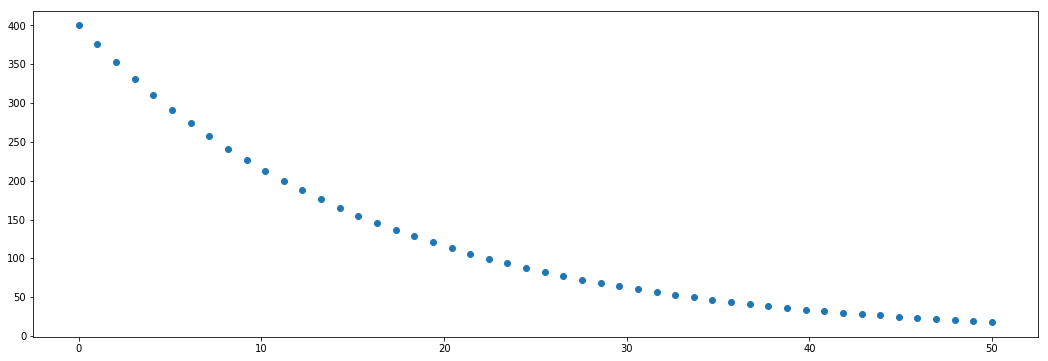

In [58]:
plt.plot(x, y, 'o')

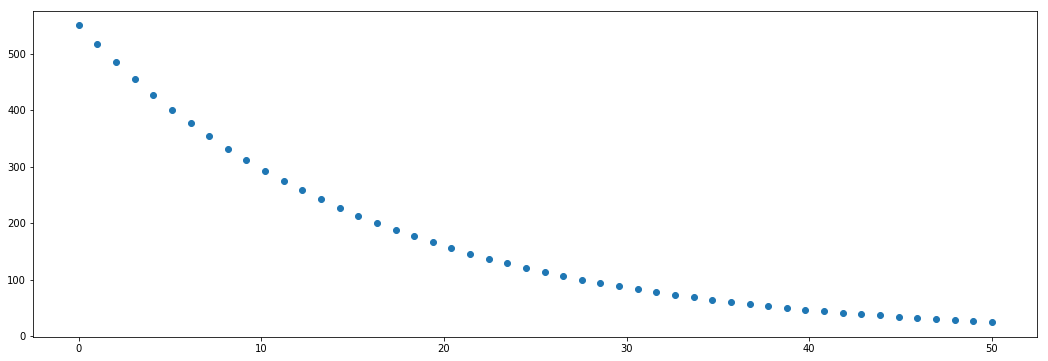

In [69]:
plt.scatter(x,y1)

In [59]:
pars, cov = curve_fit(exp_decay, x, y, p0=[0,0])

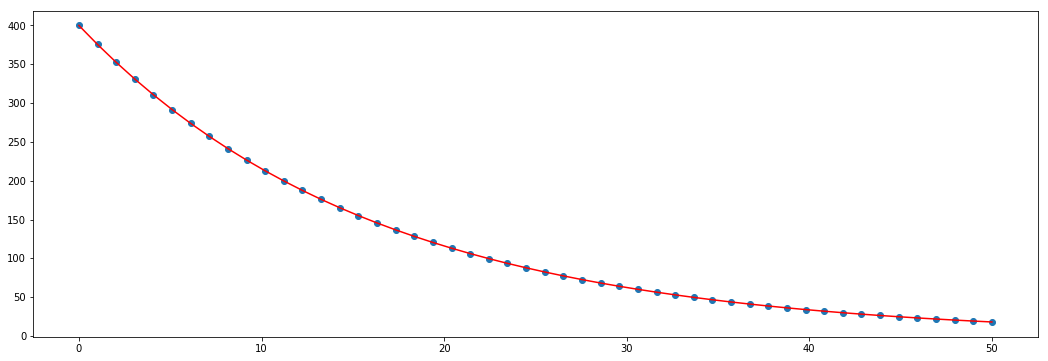

In [61]:
plt.scatter(x,y)
plt.plot(x, exp_decay(x, *pars), 'r-')

In [62]:
pars

array([4.e+02, 6.e-02])

In [63]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y, exp_decay(x, *pars))

1.0

In [79]:
yx = np.append(y,y1)

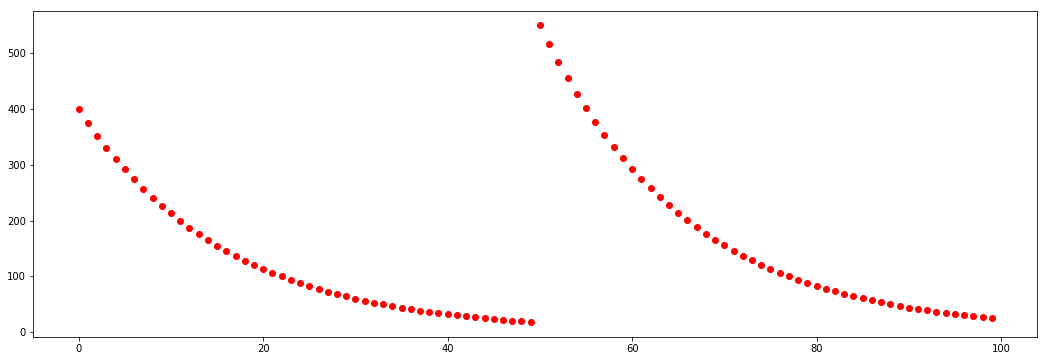

In [219]:
plt.plot(yx, 'ro')

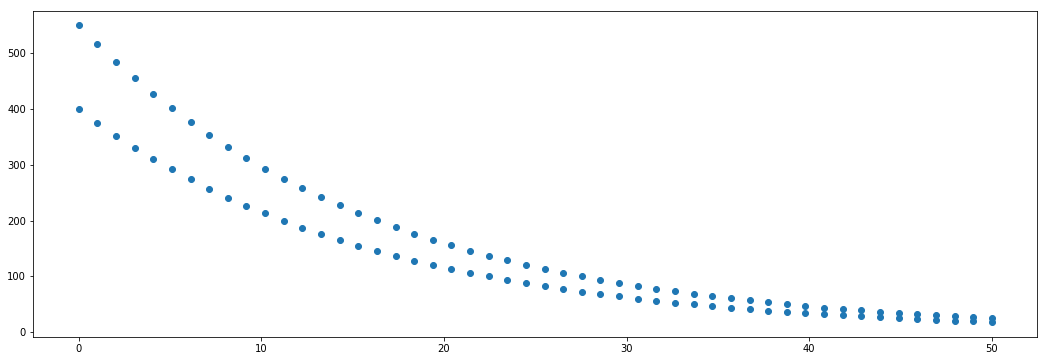

In [110]:
plt.plot(xc,yx,'o')

In [94]:
a = np.arange(0,len(yx))+1

In [95]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [101]:
c, cov = curve_fit(exp_decay, a, yx, p0=[0,0])

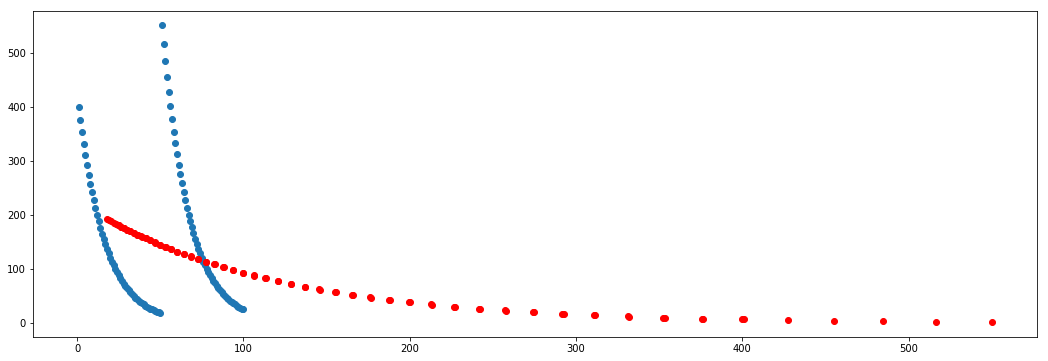

In [105]:
plt.scatter(a,yx)
plt.plot(yx, exp_decay(yx, *c), 'ro')

In [100]:
c

array([2.25361427e+02, 8.84712350e-03])

In [239]:
def ep(x, g, alpha, k):
    return g*(1-g)**(alpha*k*x) 

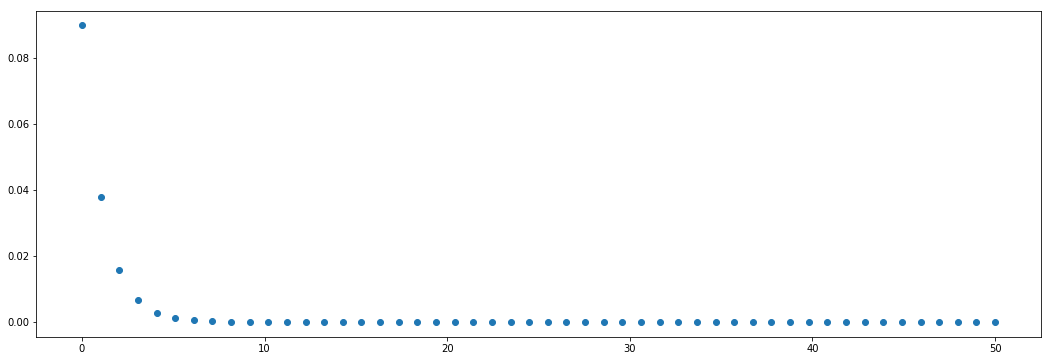

In [240]:
plt.plot(x, ep(x,0.09, 0.03, 300), 'o')

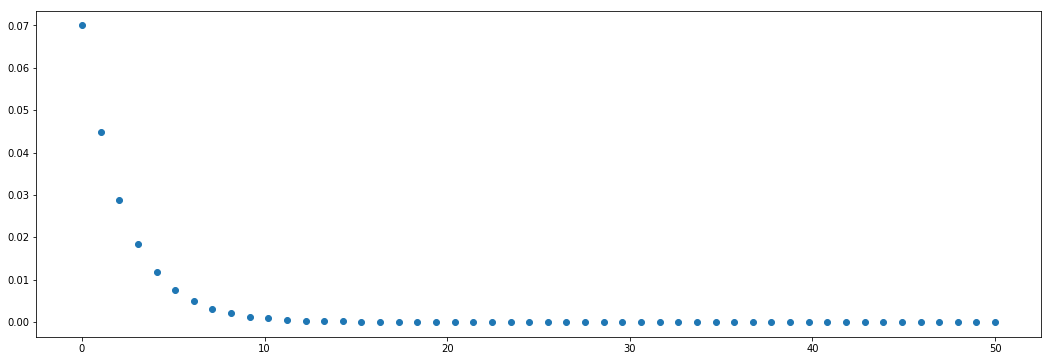

In [125]:
plt.plot(x, ep(x,0.07, 0.6, 10), 'o')

In [203]:
def data_gen(amps, decays, periods):
    
    result = []
    
    for a, d, p in zip(amps,decays,periods):
        
        x = np.linspace(0,int(abs(p)),int(abs(p)))
        
        y = a * ((1-d)**x) 
        y.tolist()
        result.append(y)
        
    return result    

In [204]:
amps = np.array([300,400,500,600,700])
decays = np.array([0.06,0.05,0.055,0.07,0.045])
periods = np.array([10,10,10,10,10])



In [205]:
dataset = data_gen(amps,decays,periods)

In [206]:
len(dataset)

5

In [207]:
flattened_list = []
for i in dataset:
    for j in i:
        flattened_list.append(j)
        

In [208]:
dataset

[array([300.        , 280.06788664, 261.46007043, 244.08856456,
        227.8712281 , 212.7313776 , 198.59742449, 185.40253657,
        173.08432198, 161.58453423]),
 array([400.        , 377.8404429 , 356.90850074, 337.13616499,
        318.45919474, 300.81690797, 284.15198435, 268.41027905,
        253.54064679, 239.4947757 ]),
 array([500.        , 469.53937095, 440.93444175, 414.07216082,
        388.84636384, 365.15735415, 342.91150873, 322.0209082 ,
        302.40298934, 283.98021878]),
 array([600.        , 553.51870857, 510.6382679 , 471.07972432,
        434.5857344 , 400.91889078, 369.86017778, 341.20754659,
        314.77460091, 290.38938431]),
 array([700.        , 665.08869212, 631.91852627, 600.40266595,
        570.45860549, 542.00795405, 514.9762304 , 489.29266793,
        464.8900294 , 441.7044309 ])]

In [209]:
len(flattened_list)

50

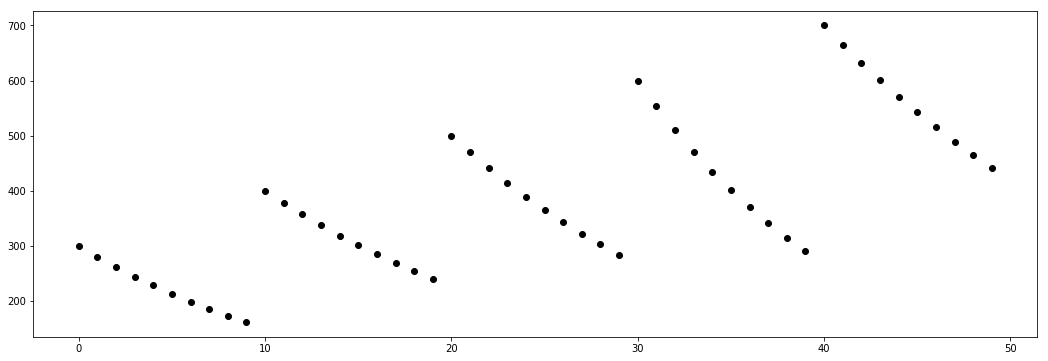

In [210]:
plt.plot(flattened_list,'ko')

In [214]:
def exp_decay2(x,a,r):
    n = 20
    x = n
    
    return a * ((1-r)**x)

In [215]:
xx = np.linspace(0,50,40)

In [216]:
yy = exp_decay2(xx,np.array([300,400]), 0.06)

In [218]:
yy

array([ 87.03187234, 116.04249645])

In [ ]:
np.insert

In [2]:
def convolution(A,B):
    
    lengthA = np.size(A)
    lengthB = np.size(B)
    
    C = np.zeros(lengthA + lengthB - 1)
    
    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            C[m+n] = C[m+n] + A[m] * B[n]
            
    return C

In [31]:
a = np.array([4,3])
b = np.array([1,1,5,5])

In [32]:
convolution(a,b)

array([ 4.,  7., 23., 35., 15.])

In [33]:
for i in np.arange(np.size(b)):
    print (i)

0
1
2
3


In [34]:
from scipy import signal

In [35]:
signal.convolve(a,b)

array([ 4,  7, 23, 35, 15])

In [36]:
np.convolve(a,b)

array([ 4,  7, 23, 35, 15])

In [37]:
?np.convolve

In [38]:
aa = np.size(a)
bb = np.size(b)
print(aa,bb)

2 4


In [39]:
cc = np.zeros(aa + bb - 1)
cc

array([0., 0., 0., 0., 0.])

In [40]:
for m in np.arange(aa):
    for n in np.arange(bb):
        print(m,n)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [26]:
np.arange(aa)

array([0, 1])

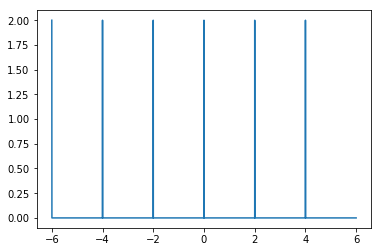

In [48]:
T = 2                      # time distance between pulses
Fs = 1000                  # sampling frequency, used for discretizing the system
t = np.arange(-6, 6, 1/Fs) # time range to consider
comb = np.zeros_like(t)
comb[::int(Fs*T)] = T     # Comb becomes T every T*Fs samples
plt.plot(t, comb)

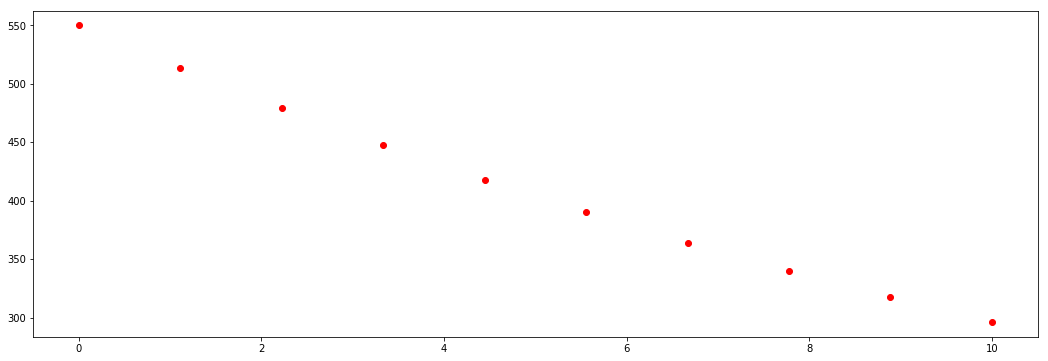

In [71]:
plt.plot(xx, exp_decay(xx, 550, 0.06),'ro')

In [68]:
t

array([-6.   , -5.999, -5.998, ...,  5.997,  5.998,  5.999])

In [69]:
np.convolve(exp_decay(xx, 550, 0.06), comb)

array([1100.        , 1026.91558436,  958.68692491, ...,    0.        ,
          0.        ,    0.        ])

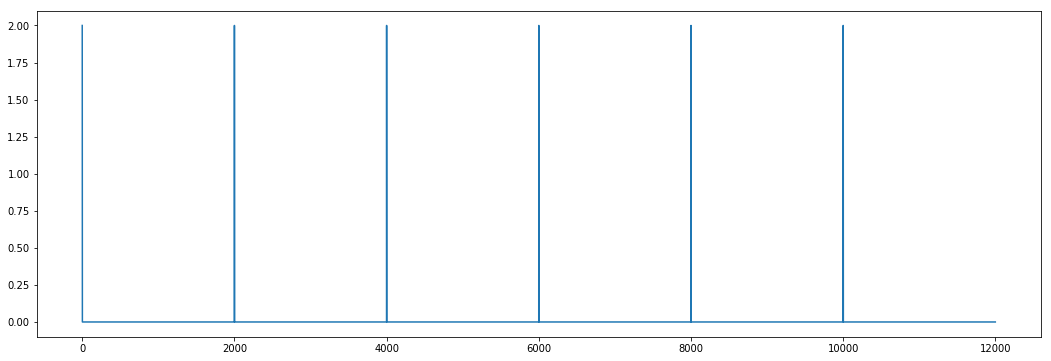

In [88]:
plt.plot(comb)

In [74]:
aa = exp_decay(xx, 550, 0.06)

In [76]:
type(comb)

numpy.ndarray

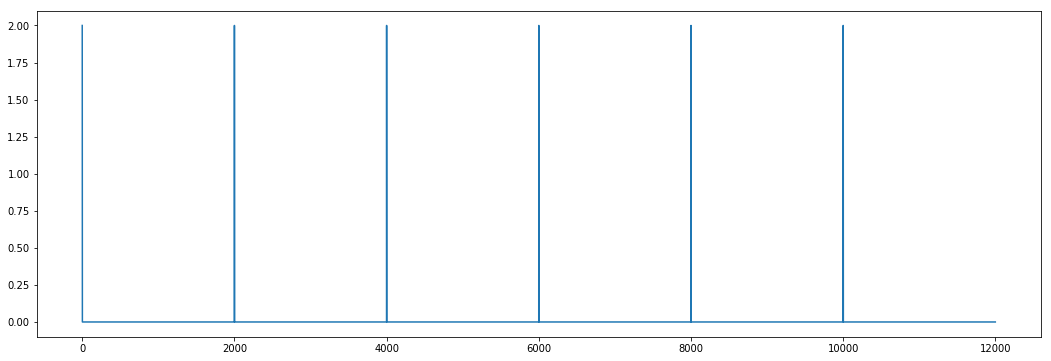

In [78]:
plt.plot(comb);

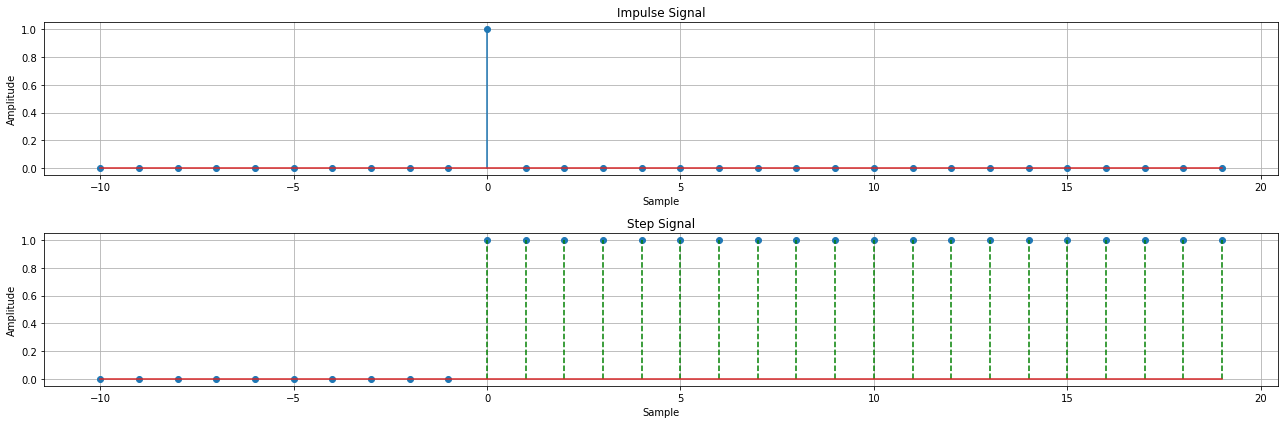

In [82]:
# generate sample axis
n = np.arange(-10, 20)
l = np.size(n)
imp = np.zeros(l)
ind = np.where(n==0)
imp[ind] = 1
plt.subplot(2,1,1)
plt.stem(n,imp); plt.title('Impulse Signal')
plt.xlabel('Sample'); plt.ylabel('Amplitude')
plt.grid(True)

# generate Step signal
stp = np.zeros(l)
ind = np.where(n >= 0)
stp[ind] = 1
#plt.figure(2)
plt.subplot(2,1,2)
plt.stem(n,stp,'g--'); plt.title('Step Signal')
plt.xlabel('Sample'); plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

In [84]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp

In [85]:
x = sp.Symbol('x')
f = sp.Function('f')(x)
f

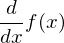

In [86]:
f.diff(x)

In [89]:
aa

array([550.        , 513.45779218, 479.34346245, 447.49570169,
       417.76391818, 390.0075256 , 364.09527823, 339.90465037,
       317.32125697, 296.23831275])

In [92]:
aa[:]

array([550.        , 513.45779218, 479.34346245, 447.49570169,
       417.76391818, 390.0075256 , 364.09527823, 339.90465037,
       317.32125697, 296.23831275])

In [98]:
comb[::(100)]

array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [99]:
np.arange(-6,6, 1/Fs)

array([-6.   , -5.999, -5.998, ...,  5.997,  5.998,  5.999])

In [103]:
len(np.arange(0,50, 1/Fs))

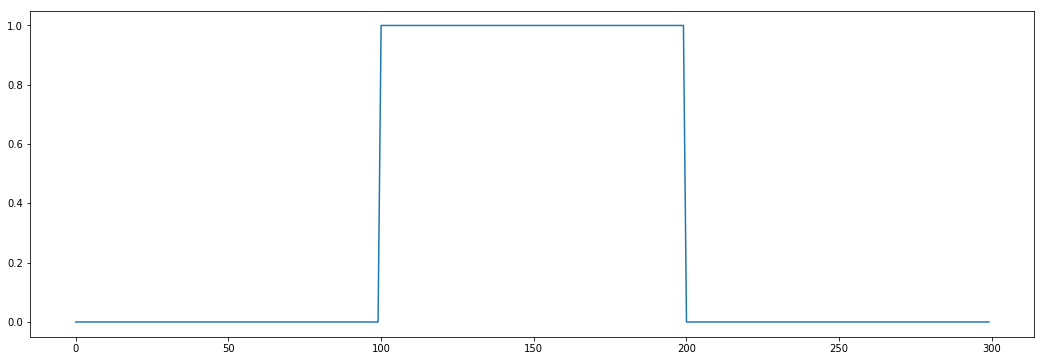

In [104]:
sig = np.repeat([0., 1., 0.], 100)
plt.plot(sig)

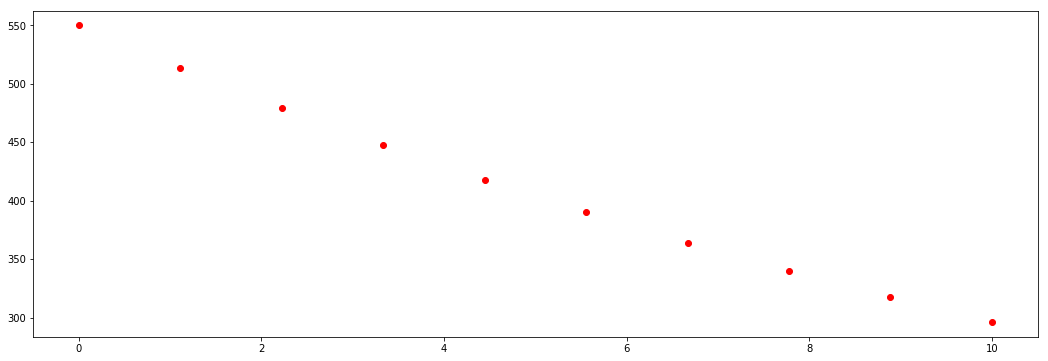

In [108]:
plt.plot(xx, exp_decay(xx, 550, 0.06),'ro')

In [109]:
x2 = exp_decay(xx, 550, 0.06)

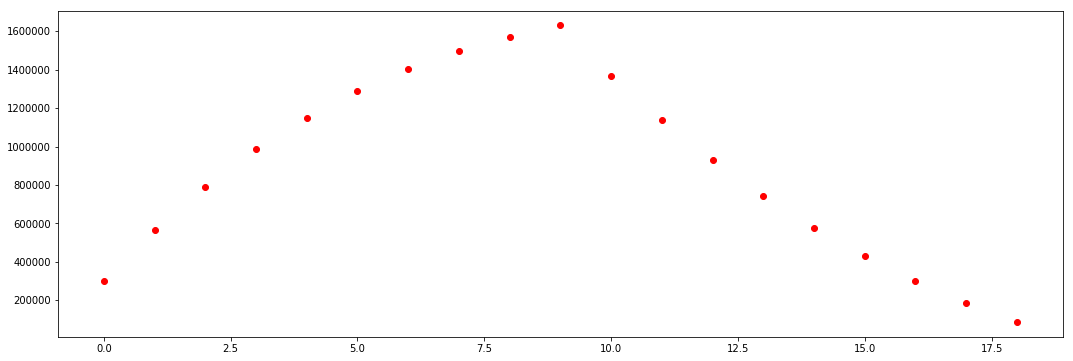

In [112]:
# generate sample axis
n = np.arange(-10, 20)
l = np.size(n)
imp = np.zeros(l)
ind = np.where(n==0)
imp[ind] = 1
plt.subplot(2,1,1)
plt.stem(n,imp); plt.title('Impulse Signal')
plt.xlabel('Sample'); plt.ylabel('Amplitude')
plt.grid(True)

# generate Step signal
stp = np.zeros(l)
ind = np.where(n >= 0)
stp[ind] = 1
#plt.figure(2)
plt.subplot(2,1,2)
plt.stem(n,stp,'g--'); plt.title('Step Signal')
plt.xlabel('Sample'); plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

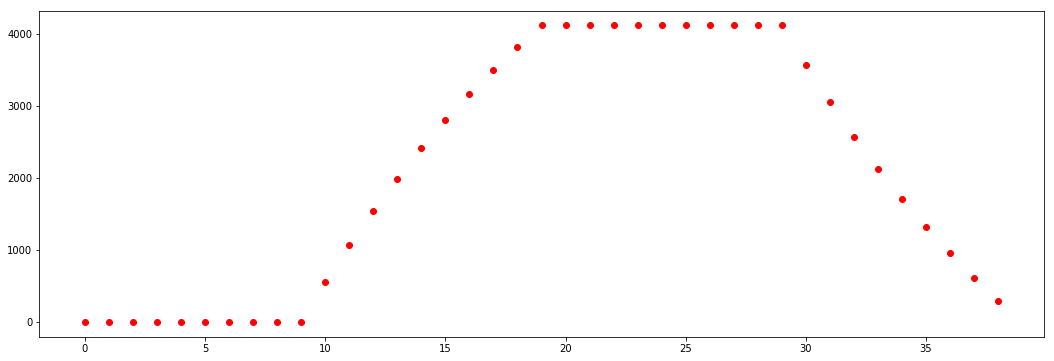

In [115]:
plt.plot(signal.convolve(stp,x2),'ro')